## Overview

This notebook will show you how to create and query a table or DataFrame that you uploaded to DBFS. [DBFS](https://docs.databricks.com/user-guide/dbfs-databricks-file-system.html) is a Databricks File System that allows you to store data for querying inside of Databricks. This notebook assumes that you have a file already inside of DBFS that you would like to read from.

This notebook is written in **Python** so the default cell type is Python. However, you can use different languages by using the `%LANGUAGE` syntax. Python, Scala, SQL, and R are all supported.

In [0]:
df_2017 = spark.read.csv(path = "/FileStore/tables/FIFA17_official_data.csv", header = True)
df_2018 = spark.read.csv(path = "/FileStore/tables/FIFA18_official_data.csv", header = True)
df_2019 = spark.read.csv(path = "/FileStore/tables/FIFA19_official_data.csv", header = True)
df_2020 = spark.read.csv(path = "/FileStore/tables/FIFA20_official_data.csv", header = True)
df_2021 = spark.read.csv(path = "/FileStore/tables/FIFA21_official_data.csv", header = True)
df_2022 = spark.read.csv(path = "/FileStore/tables/FIFA22_official_data.csv", header = True)
df_2023 = spark.read.csv(path = "/FileStore/tables/FIFA23_official_data.csv", header = True)
df_2023_final = spark.read.csv(path = "/FileStore/tables/Fifa_23_Players_Data.csv", header = True)

In [0]:
#Converting all lowercase letters in the column names to uppercase
from functools import reduce
current_columns = df_2023_final.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2023_final = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2023_final)

In [0]:
current_columns = df_2017.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2017 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2017)

In [0]:
current_columns = df_2018.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2018 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2018)

In [0]:
current_columns = df_2019.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2019 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2019)

In [0]:
current_columns = df_2020.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2020 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2020)

In [0]:
current_columns = df_2021.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2021 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2021)

In [0]:
current_columns = df_2022.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2022 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2022)

In [0]:
current_columns = df_2023.columns
new_columns = list(map(lambda item : item.replace(" ","_").upper(),current_columns))
df_2023 = reduce(lambda data, idx: data.withColumnRenamed(current_columns[idx], new_columns[idx]), range(len(current_columns)), df_2023)

In [0]:
#Renaming the columns in df_2023_final to make them uniform with other dataframes
df_2023_final = df_2023_final.withColumnRenamed('KNOWN_AS', 'NAME').withColumnRenamed('BEST_POSITION', 'POSITION')

In [0]:
#Adding a year column to all the dataframes
from pyspark.sql.functions import lit
df_2017 = df_2017.withColumn('YEAR', lit(2017))
df_2018 = df_2018.withColumn('YEAR', lit(2018))
df_2019 = df_2019.withColumn('YEAR', lit(2019))
df_2020 = df_2020.withColumn('YEAR', lit(2020))
df_2021 = df_2021.withColumn('YEAR', lit(2021))
df_2022 = df_2022.withColumn('YEAR', lit(2022))
df_2023 = df_2023.withColumn('YEAR', lit(2023))
df_2023_final = df_2023_final.withColumn('YEAR', lit(2023))

In [0]:
#Cleaning the name column
import re
def get_name_str(s):
    return re.sub('[0-9]','',s).strip()

In [0]:
from pyspark.sql.functions import *
name_change = udf(lambda s : get_name_str(s), StringType())

In [0]:
df_2017 = df_2017.withColumn("NAME",name_change(col("NAME"))) 
df_2018 = df_2018.withColumn("NAME",name_change(col("NAME")))
df_2019 = df_2019.withColumn("NAME",name_change(col("NAME")))
df_2020 = df_2020.withColumn("NAME",name_change(col("NAME")))
df_2021 = df_2021.withColumn("NAME",name_change(col("NAME")))
df_2022 = df_2022.withColumn("NAME",name_change(col("NAME")))
df_2023 = df_2023.withColumn("NAME",name_change(col("NAME")))
df_2023_final = df_2023_final.withColumn("NAME",name_change(col("NAME")))

In [0]:
#Cleaning the height column
def get_height_str(s):
    if 'cm' in s:
        n=int(s.strip('cm'))
    else:
        h = re.split("'",s)
        n = int(h[0])*30.48 +int(h[1])*2.54
    return n

In [0]:
height_change = udf(lambda s : get_height_str(s), StringType())

In [0]:
df_2017 = df_2017.withColumn("HEIGHT",height_change(col("HEIGHT")))
df_2018 = df_2018.withColumn("HEIGHT",height_change(col("HEIGHT"))) 
df_2019 = df_2019.withColumn("HEIGHT",height_change(col("HEIGHT"))) 
df_2020 = df_2020.withColumn("HEIGHT",height_change(col("HEIGHT"))) 
df_2021 = df_2021.withColumn("HEIGHT",height_change(col("HEIGHT"))) 
df_2022 = df_2022.withColumn("HEIGHT",height_change(col("HEIGHT"))) 
df_2023 = df_2023.withColumn("HEIGHT",height_change(col("HEIGHT"))) 

In [0]:
#Cleaning the weight column
def get_weight_str(s):
    if 'kg' in s:
        k=int(s.strip('kg'))*2.20
    else:
        k = re.split('lbs', s)
        k=int(k[0])
    return k

In [0]:
weight_change = udf(lambda s : get_weight_str(s), StringType())

In [0]:
df_2017 = df_2017.withColumn("WEIGHT",weight_change(col("WEIGHT")))
df_2018 = df_2018.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 
df_2019 = df_2019.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 
df_2020 = df_2020.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 
df_2021 = df_2021.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 
df_2022 = df_2022.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 
df_2023 = df_2023.withColumn("WEIGHT",weight_change(col("WEIGHT"))) 

In [0]:
#Cleaning the position column
def get_position_str(s):
    if '>' in s:
        print(s)
        k = s.replace('"','').split('>')
        if k[1]:
            return k[1]

In [0]:
position_change = udf(lambda s : get_position_str(s), StringType())

In [0]:
df_2017 = df_2017.withColumn("POSITION",position_change(col("POSITION")))
df_2018 = df_2018.withColumn("POSITION",position_change(col("POSITION"))) 
df_2019 = df_2019.withColumn("POSITION",position_change(col("POSITION"))) 
df_2020 = df_2020.withColumn("POSITION",position_change(col("POSITION"))) 
df_2021 = df_2021.withColumn("POSITION",position_change(col("POSITION"))) 
df_2022 = df_2022.withColumn("POSITION",position_change(col("POSITION"))) 
df_2023 = df_2023.withColumn("POSITION",position_change(col("POSITION"))) 

In [0]:
#Cleaning wage and value columns
def value_salary_conversion(Value):  
    if isinstance(Value, str):
        out = Value.replace('€',' ')
    if 'M' in Value:
        out = float(out.replace('M',''))*1000000
    if 'K' in Value:
        out = float(out.replace('K',''))*1000
    return float(out)

In [0]:
value_change = udf(lambda x : value_salary_conversion(x), StringType())

In [0]:
df_2017 = df_2017.withColumn("VALUE",value_change(col("VALUE")))
df_2018 = df_2018.withColumn("VALUE",value_change(col("VALUE"))) 
df_2019 = df_2019.withColumn("VALUE",value_change(col("VALUE"))) 
df_2020 = df_2020.withColumn("VALUE",value_change(col("VALUE"))) 
df_2021 = df_2021.withColumn("VALUE",value_change(col("VALUE"))) 
df_2022 = df_2022.withColumn("VALUE",value_change(col("VALUE"))) 
df_2023 = df_2023.withColumn("VALUE",value_change(col("VALUE")))

In [0]:
df_2017 = df_2017.withColumn("WAGE",value_change(col("WAGE")))
df_2018 = df_2018.withColumn("WAGE",value_change(col("WAGE"))) 
df_2019 = df_2019.withColumn("WAGE",value_change(col("WAGE"))) 
df_2020 = df_2020.withColumn("WAGE",value_change(col("WAGE"))) 
df_2021 = df_2021.withColumn("WAGE",value_change(col("WAGE"))) 
df_2022 = df_2022.withColumn("WAGE",value_change(col("WAGE"))) 
df_2023 = df_2023.withColumn("WAGE",value_change(col("WAGE")))

In [0]:
#Dropping duplicate rows based on 'Name'
df_2023_final = df_2023_final.dropDuplicates(['NAME'])
df_2017 = df_2017.dropDuplicates(['NAME'])
df_2018 = df_2018.dropDuplicates(['NAME'])
df_2019 = df_2019.dropDuplicates(['NAME'])
df_2020 = df_2020.dropDuplicates(['NAME'])
df_2021 = df_2021.dropDuplicates(['NAME'])
df_2022 = df_2022.dropDuplicates(['NAME'])
df_2023 = df_2023.dropDuplicates(['NAME'])

In [0]:
#Since, df_2023_final does not have ID column, adding ID column to the dataframe using IDs from all other dataframes
df17 = df_2017.select('ID', 'NAME')
df18 = df_2018.select('ID', 'NAME')
df19 = df_2019.select('ID', 'NAME')
df20 = df_2020.select('ID', 'NAME')
df21 = df_2021.select('ID', 'NAME')
df22 = df_2022.select('ID', 'NAME')
df23 = df_2023.select('ID', 'NAME')

In [0]:
from pyspark.sql import DataFrame
dfs = [df17, df18, df19, df20, df21, df22, df23]
df_all = reduce(DataFrame.unionAll, dfs)

In [0]:
df_all = df_all.distinct()

In [0]:
#Merged all the ids and names with 2023 dataframe to get the ids to df_2023_final
df_2023_final = df_2023_final.join(df_all, on = 'NAME')

In [0]:
from pyspark.sql.functions import lit
for column in [column for column in df_2023_final.columns
                if column not in df_2023.columns]:
     df_2023 = df_2023.withColumn(column, lit(None))

In [0]:
#Joining df_2023_final with df_2023 to make it uniform with the dataframes of all other years
df_2023_final=df_2023_final.join(df_2023.select('PHOTO','FLAG','CLUB','CLUB_LOGO','VALUE','WAGE','SPECIAL','WEAK_FOOT','WORK_RATE','BODY_TYPE','REAL_FACE', 'JOINED','CONTRACT_VALID_UNTIL','HEIGHT','WEIGHT','KIT_NUMBER', 'NAME'), on = 'NAME')

In [0]:
#Cleaning column names in df_2023_final
df_2023_final = df_2023_final.withColumnRenamed( 'HEADING_ACCURACY','HEADINGACCURACY')
df_2023_final = df_2023_final.withColumnRenamed('SHORT_PASSING','SHORTPASSING')
df_2023_final = df_2023_final.withColumnRenamed( 'FREEKICK_ACCURACY','FKACCURACY')
df_2023_final = df_2023_final.withColumnRenamed( 'SPRINT_SPEED','SPRINTSPEED')
df_2023_final = df_2023_final.withColumnRenamed( 'SHOT_POWER','SHOTPOWER')
df_2023_final = df_2023_final.withColumnRenamed( 'LONG_SHOTS','LONGSHOTS')
df_2023_final = df_2023_final.withColumnRenamed( 'STANDING_TACKLE','STANDINGTACKLE')
df_2023_final = df_2023_final.withColumnRenamed( 'SLIDING_TACKLE','SLIDINGTACKLE')

In [0]:
#Dropping unwanted columns
df_2017 = df_2017.drop('PHOTO', 'FLAG', 'JERSEY_NUMBER', 'LOANED_FROM', 'GKDIVING','GKHANDLING','GKKICKING','GKPOSITIONING','GKREFLEXES', 'BEST_POSITION', 'BEST_OVERALL_RATING', 'CLUB_LOGO', 'REAL_FACE')

In [0]:
final_cols = [df_2017.columns]

In [0]:
final_cols

Out[38]: [['ID',
  'NAME',
  'AGE',
  'NATIONALITY',
  'OVERALL',
  'POTENTIAL',
  'CLUB',
  'VALUE',
  'WAGE',
  'SPECIAL',
  'PREFERRED_FOOT',
  'INTERNATIONAL_REPUTATION',
  'WEAK_FOOT',
  'SKILL_MOVES',
  'WORK_RATE',
  'BODY_TYPE',
  'POSITION',
  'JOINED',
  'CONTRACT_VALID_UNTIL',
  'HEIGHT',
  'WEIGHT',
  'CROSSING',
  'FINISHING',
  'HEADINGACCURACY',
  'SHORTPASSING',
  'VOLLEYS',
  'DRIBBLING',
  'CURVE',
  'FKACCURACY',
  'LONGPASSING',
  'BALLCONTROL',
  'ACCELERATION',
  'SPRINTSPEED',
  'AGILITY',
  'REACTIONS',
  'BALANCE',
  'SHOTPOWER',
  'JUMPING',
  'STAMINA',
  'STRENGTH',
  'LONGSHOTS',
  'AGGRESSION',
  'INTERCEPTIONS',
  'POSITIONING',
  'VISION',
  'PENALTIES',
  'COMPOSURE',
  'MARKING',
  'STANDINGTACKLE',
  'SLIDINGTACKLE',
  'YEAR']]

In [0]:
#Making all dataframes uniform
df_2018 = df_2018.select(*final_cols)
df_2019 = df_2019.select(*final_cols)
df_2020 = df_2020.select(*final_cols)
df_2021 = df_2021.select(*final_cols)
df_2022 = df_2022.select(*final_cols)

In [0]:
df_2023_final.columns

Out[40]: ['NAME',
 'FULL_NAME',
 'OVERALL',
 'POTENTIAL',
 'VALUE(IN_EURO)',
 'POSITIONS_PLAYED',
 'POSITION',
 'NATIONALITY',
 'IMAGE_LINK',
 'AGE',
 'HEIGHT(IN_CM)',
 'WEIGHT(IN_KG)',
 'TOTALSTATS',
 'BASESTATS',
 'CLUB_NAME',
 'WAGE(IN_EURO)',
 'RELEASE_CLAUSE',
 'CLUB_POSITION',
 'CONTRACT_UNTIL',
 'CLUB_JERSEY_NUMBER',
 'JOINED_ON',
 'ON_LOAN',
 'PREFERRED_FOOT',
 'WEAK_FOOT_RATING',
 'SKILL_MOVES',
 'INTERNATIONAL_REPUTATION',
 'NATIONAL_TEAM_NAME',
 'NATIONAL_TEAM_IMAGE_LINK',
 'NATIONAL_TEAM_POSITION',
 'NATIONAL_TEAM_JERSEY_NUMBER',
 'ATTACKING_WORK_RATE',
 'DEFENSIVE_WORK_RATE',
 'PACE_TOTAL',
 'SHOOTING_TOTAL',
 'PASSING_TOTAL',
 'DRIBBLING_TOTAL',
 'DEFENDING_TOTAL',
 'PHYSICALITY_TOTAL',
 'CROSSING',
 'FINISHING',
 'HEADINGACCURACY',
 'SHORTPASSING',
 'VOLLEYS',
 'DRIBBLING',
 'CURVE',
 'FKACCURACY',
 'LONGPASSING',
 'BALLCONTROL',
 'ACCELERATION',
 'SPRINTSPEED',
 'AGILITY',
 'REACTIONS',
 'BALANCE',
 'SHOTPOWER',
 'JUMPING',
 'STAMINA',
 'STRENGTH',
 'LONGSHOTS',
 'AGGRE

In [0]:
df_2023_final = df_2023_final.select(*final_cols)

In [0]:
#Combining all the dataframes such that we are left with recent attributes of all players
df_x = [df_2023_final, df_2022, df_2021, df_2020, df_2019, df_2018, df_2017]
df_train = reduce(DataFrame.unionAll, df_x)

In [0]:
df_train.count()

Out[43]: 110294

In [0]:
display(df_train)

ID,NAME,AGE,NATIONALITY,OVERALL,POTENTIAL,CLUB,VALUE,WAGE,SPECIAL,PREFERRED_FOOT,INTERNATIONAL_REPUTATION,WEAK_FOOT,SKILL_MOVES,WORK_RATE,BODY_TYPE,POSITION,JOINED,CONTRACT_VALID_UNTIL,HEIGHT,WEIGHT,CROSSING,FINISHING,HEADINGACCURACY,SHORTPASSING,VOLLEYS,DRIBBLING,CURVE,FKACCURACY,LONGPASSING,BALLCONTROL,ACCELERATION,SPRINTSPEED,AGILITY,REACTIONS,BALANCE,SHOTPOWER,JUMPING,STAMINA,STRENGTH,LONGSHOTS,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,MARKING,STANDINGTACKLE,SLIDINGTACKLE,YEAR
269538,A. Abdusalam,19,China PR,53,63,Zhejiang Professional FC,200000.0,950.0,1405,Right,1,3.0,2,Medium/ Medium,Lean (170-185),RM,"Apr 1, 2022",2027,175,134.20000000000002,43,33,40,56,33,53,38,32,51,46,58,53,68,63,79,45,71,62,37,38,53,46,56,49,42,42,40,43,35,2023
243210,A. Abeid,24,Mauritania,64,68,AFC UTA Arad,775000.0,2000.0,1628,Left,1,3.0,2,High/ Medium,Normal (170-185),LB,"Jul 1, 2022",2023,174,160.60000000000002,51,40,59,61,33,52,47,42,51,61,74,71,75,61,74,46,70,89,76,44,55,58,40,42,40,55,54,60,60,2023
229579,A. Accardi,26,Italy,63,66,Palermo,550000.0,1000.0,1589,Right,1,3.0,2,Low/ High,Normal (170-185),CB,"Jul 7, 2015",2023,179,165.0,50,30,60,55,37,45,34,30,50,53,80,80,78,59,68,58,74,63,66,46,69,55,37,35,42,47,70,65,64,2023
246328,A. Aidonis,21,Germany,61,70,VfB Stuttgart,700000.0,3000.0,1419,Right,1,3.0,2,Medium/ Medium,Normal (185+),CB,"Nov 10, 2018",2023,185,187.00000000000003,33,25,56,47,35,42,35,31,43,47,55,55,65,60,64,48,73,54,66,25,55,61,26,39,41,45,63,65,62,2023
266647,A. Aires,18,Uruguay,59,78,Liverpool Fútbol Club,575000.0,500.0,1437,Right,1,2.0,2,Medium/ Medium,Normal (170-185),ST,"Jan 1, 2019",2024,177,162.8,28,67,49,49,63,65,47,59,35,55,68,69,67,48,72,53,51,61,54,62,29,18,61,47,62,45,13,12,18,2023
241394,A. Akinola,22,Canada,66,75,Toronto FC,1900000.0,2000.0,1576,Right,1,3.0,3,High/ Low,Stocky (170-185),ST,"Jan 20, 2022",2024,178,193.60000000000002,43,69,60,54,58,58,57,34,43,59,79,84,70,56,66,70,75,50,84,59,63,18,66,46,61,60,12,19,13,2023
264098,A. Akurugu,20,Ghana,62,74,Getafe CF,925000.0,3000.0,1450,Left,1,3.0,2,Medium/ Medium,Normal (170-185),LB,"Aug 1, 2020",2023,174,154.0,56,22,58,56,28,53,40,26,31,55,74,73,63,61,74,46,55,54,57,24,52,63,45,35,38,45,52,59,60,2023
221772,A. Al Bishi,28,Saudi Arabia,69,69,Al Ittihad,1400000.0,18000.0,1757,Left,1,2.0,3,High/ Low,Normal (170-185),RM,"Jan 24, 2019",2026,173,160.60000000000002,60,59,47,62,54,72,72,59,62,69,89,89,86,59,88,64,82,72,66,55,53,28,60,63,51,67,21,26,31,2023
259176,A. Al Haider,25,Saudi Arabia,60,65,Al Adalah,325000.0,3000.0,1660,Right,1,4.0,2,High/ Medium,Lean (170-185),RM,"Jul 24, 2022",2024,173,129.8,55,50,41,52,47,60,47,42,52,55,88,83,81,50,80,54,61,75,52,50,66,54,55,53,40,54,53,54,50,2023
270626,A. Al Hajeri,26,Saudi Arabia,56,59,Al Wehda,170000.0,4000.0,1447,Left,1,2.0,2,Medium/ Medium,Lean (170-185),LWB,"Jul 17, 2022",2025,179,156.20000000000002,52,38,44,51,25,53,40,41,53,51,66,65,56,51,58,42,57,60,56,37,44,55,47,44,54,45,54,53,53,2023


In [0]:
#Loading df_train
df_train = spark.read.csv(path = "dbfs:/FileStore/tables/finaldf.csv", header = True)

In [0]:
df_train.printSchema()

root
 |-- ID: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- AGE: string (nullable = true)
 |-- NATIONALITY: string (nullable = true)
 |-- OVERALL: string (nullable = true)
 |-- POTENTIAL: string (nullable = true)
 |-- CLUB: string (nullable = true)
 |-- VALUE: string (nullable = true)
 |-- WAGE: string (nullable = true)
 |-- SPECIAL: string (nullable = true)
 |-- PREFERRED_FOOT: string (nullable = true)
 |-- INTERNATIONAL_REPUTATION: string (nullable = true)
 |-- WEAK_FOOT: string (nullable = true)
 |-- SKILL_MOVES: string (nullable = true)
 |-- WORK_RATE: string (nullable = true)
 |-- BODY_TYPE: string (nullable = true)
 |-- POSITION: string (nullable = true)
 |-- JOINED: string (nullable = true)
 |-- CONTRACT_VALID_UNTIL: string (nullable = true)
 |-- HEIGHT: string (nullable = true)
 |-- WEIGHT: string (nullable = true)
 |-- CROSSING: string (nullable = true)
 |-- FINISHING: string (nullable = true)
 |-- HEADINGACCURACY: string (nullable = true)
 |-- SHORTPASSING

In [0]:
# Set final schema
df_train = df_train.select(df_train.ID, df_train.NAME, df_train.AGE.cast('int'), df_train.NATIONALITY, df_train.OVERALL.cast('int'), df_train.POTENTIAL.cast('double'), df_train.CLUB, df_train.VALUE.cast('double'), df_train.WAGE.cast('double'), df_train.SPECIAL.cast('double'), df_train.PREFERRED_FOOT, df_train.INTERNATIONAL_REPUTATION.cast('double'), df_train.WEAK_FOOT.cast('double'), df_train.SKILL_MOVES.cast('double'), df_train.WORK_RATE, df_train.BODY_TYPE, df_train.POSITION, df_train.JOINED, df_train.CONTRACT_VALID_UNTIL, df_train.HEIGHT.cast('float'), df_train.WEIGHT.cast('float'), df_train.CROSSING.cast('double'), df_train.FINISHING.cast('double'), df_train.HEADINGACCURACY.cast('double'), df_train.SHORTPASSING.cast('double'), df_train.VOLLEYS.cast('double'), df_train.DRIBBLING.cast('double'), df_train.CURVE.cast('double'), df_train.FKACCURACY.cast('double'), df_train.LONGPASSING.cast('double'), df_train.BALLCONTROL.cast('double'), df_train.ACCELERATION.cast('double'), df_train.SPRINTSPEED.cast('double'), df_train.AGILITY.cast('double'), df_train.REACTIONS.cast('double'), df_train.BALANCE.cast('double'), df_train.SHOTPOWER.cast('double'), df_train.JUMPING.cast('double'), df_train.STAMINA.cast('double'), df_train.STRENGTH.cast('double'), df_train.LONGSHOTS.cast('double'), df_train.AGGRESSION.cast('double'), df_train.INTERCEPTIONS.cast('double'), df_train.POSITIONING.cast('double'), df_train.VISION.cast('double'), df_train.PENALTIES.cast('double'), df_train.COMPOSURE.cast('double'), df_train.MARKING.cast('double'), df_train.STANDINGTACKLE.cast('double'), df_train.SLIDINGTACKLE.cast('double'), df_train.YEAR)

In [0]:
#Checking null values
dfb = df_train.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df_train.columns])
dfb.show()

+---+----+---+-----------+-------+---------+----+-----+----+-------+--------------+------------------------+---------+-----------+---------+---------+--------+------+--------------------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+-------+--------------+-------------+----+
| ID|NAME|AGE|NATIONALITY|OVERALL|POTENTIAL|CLUB|VALUE|WAGE|SPECIAL|PREFERRED_FOOT|INTERNATIONAL_REPUTATION|WEAK_FOOT|SKILL_MOVES|WORK_RATE|BODY_TYPE|POSITION|JOINED|CONTRACT_VALID_UNTIL|HEIGHT|WEIGHT|CROSSING|FINISHING|HEADINGACCURACY|SHORTPASSING|VOLLEYS|DRIBBLING|CURVE|FKACCURACY|LONGPASSING|BALLCONTROL|ACCELERATION|SPRINTSPEED|AGILITY|REACTIONS|BALANCE|SHOTPOWER|JUMPING|STAMINA|STRENGTH|LONGSHOTS|AGGRESSION|INTERCEPTIONS|POSITIONING|VISION|PENALTIES|COMPOSURE|MARKING|STANDINGTACKL

As we can see columns Marking, Joined, Contractvaliduntil, Bodytype have null values (Marking especially has half null values) and the correlation is also low. so, we decided to drop them.

In [0]:
df_train = df_train.drop('MARKING', 'JOINED', 'CONTRACT_VALID_UNTIL', 'BODY_TYPE')

The missing data in 'volleys', 'curve', 'agility', 'balance', 'jumping', 'interceptions', 'positioning', 'vision', 'composure', 'slidingtackle', 'position' columns is based on individual human being and the even the missing rows are also quite less. so, we decided to drop those rows.

In [0]:
df_train = df_train.dropna(subset = ['VALUE', 'VOLLEYS', 'CURVE', 'AGILITY', 'BALANCE', 'JUMPING', 'INTERCEPTIONS', 'POSITIONING', 'VISION', 'COMPOSURE', 'SLIDINGTACKLE', 'POSITION'])

Since Club and Position are important features, we decided to fill them respectively.

In [0]:
df_train=df_train.fillna({'CLUB':'NO CLUB','POSITION':'NO POSITION'})

In [0]:
dfc = df_train.select([count(when(col(c).contains('None') | \
                            col(c).contains('NULL') | \
                            (col(c) == '' ) | \
                            col(c).isNull() | \
                            isnan(c), c 
                           )).alias(c)
                    for c in df_train.columns])
dfc.show()

+---+----+---+-----------+-------+---------+----+-----+----+-------+--------------+------------------------+---------+-----------+---------+--------+------+------+--------+---------+---------------+------------+-------+---------+-----+----------+-----------+-----------+------------+-----------+-------+---------+-------+---------+-------+-------+--------+---------+----------+-------------+-----------+------+---------+---------+--------------+-------------+----+
| ID|NAME|AGE|NATIONALITY|OVERALL|POTENTIAL|CLUB|VALUE|WAGE|SPECIAL|PREFERRED_FOOT|INTERNATIONAL_REPUTATION|WEAK_FOOT|SKILL_MOVES|WORK_RATE|POSITION|HEIGHT|WEIGHT|CROSSING|FINISHING|HEADINGACCURACY|SHORTPASSING|VOLLEYS|DRIBBLING|CURVE|FKACCURACY|LONGPASSING|BALLCONTROL|ACCELERATION|SPRINTSPEED|AGILITY|REACTIONS|BALANCE|SHOTPOWER|JUMPING|STAMINA|STRENGTH|LONGSHOTS|AGGRESSION|INTERCEPTIONS|POSITIONING|VISION|PENALTIES|COMPOSURE|STANDINGTACKLE|SLIDINGTACKLE|YEAR|
+---+----+---+-----------+-------+---------+----+-----+----+-------+--

df_train is the clean dataset with no null values which is going to be used to train the model

VISUALISATIONS

In [0]:
df_viz = df_train

Out[54]: <AxesSubplot:title={'center':'Correlation'}>

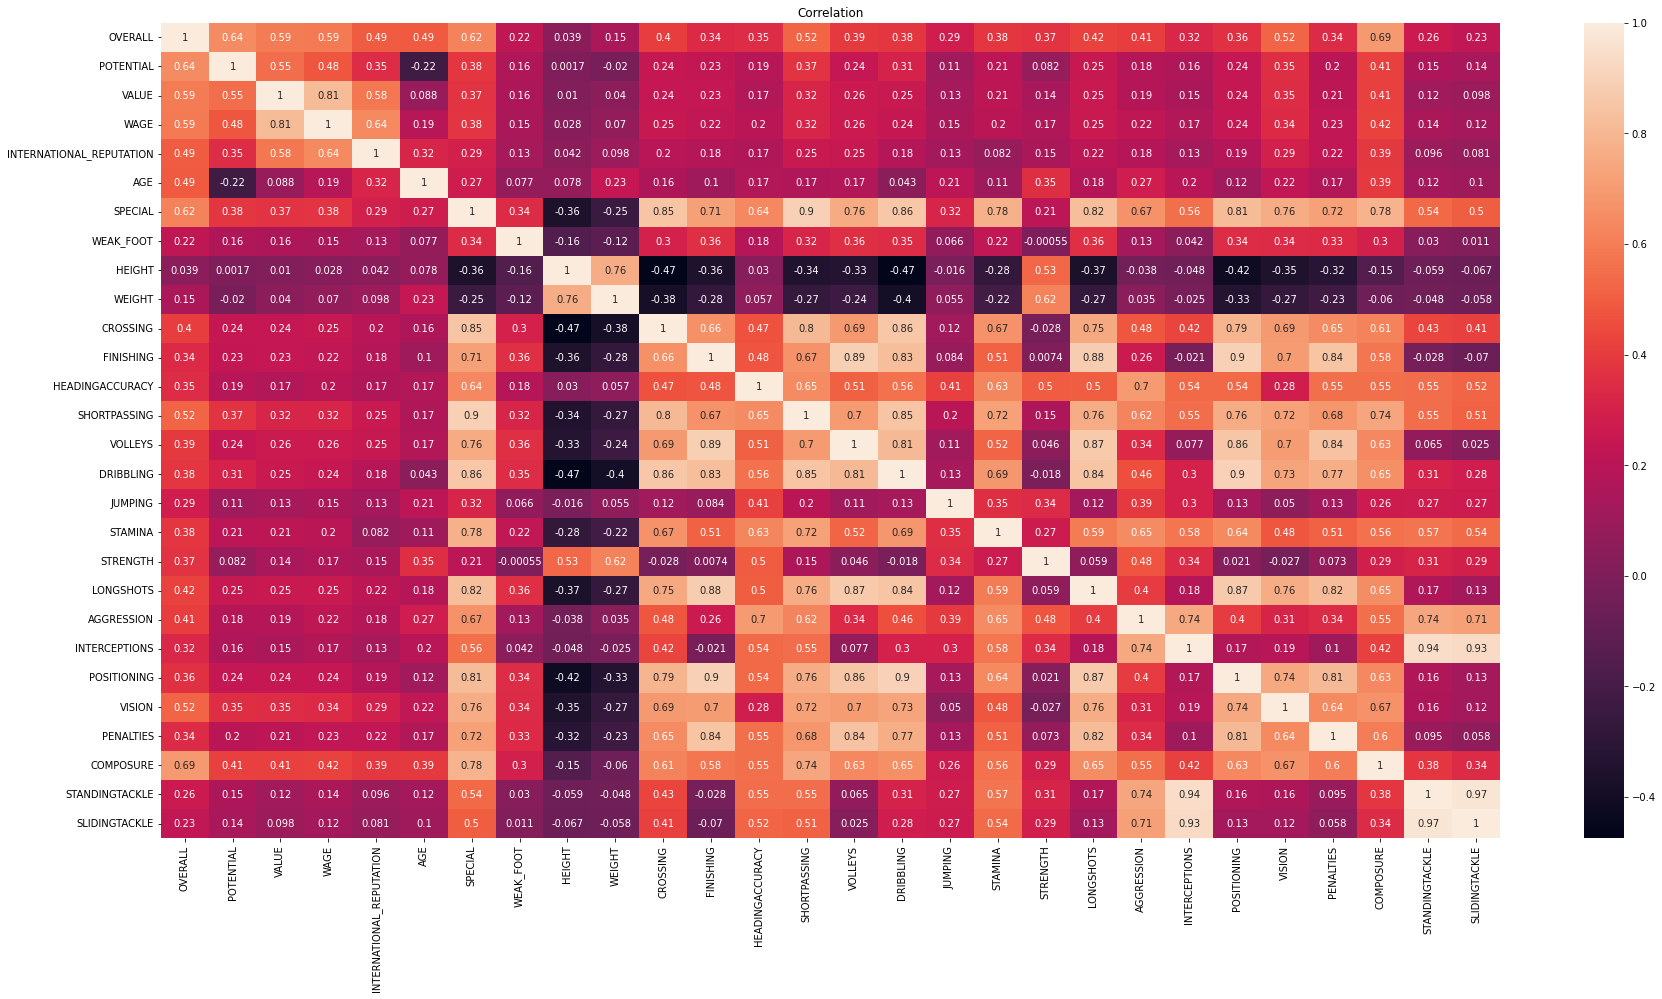

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
heat_map=df_viz.select('OVERALL','POTENTIAL','VALUE','WAGE','INTERNATIONAL_REPUTATION','AGE','SPECIAL','WEAK_FOOT','HEIGHT','WEIGHT','CROSSING','FINISHING','HEADINGACCURACY','SHORTPASSING','VOLLEYS','DRIBBLING','JUMPING','STAMINA','STRENGTH','LONGSHOTS','AGGRESSION','INTERCEPTIONS','POSITIONING','VISION','PENALTIES','COMPOSURE','STANDINGTACKLE','SLIDINGTACKLE')
heat_map = heat_map.toPandas()
plt.figure(figsize = (30,15))
plt.title('Correlation')
sns.heatmap(heat_map.corr(), annot = True)

In [0]:
df_vizp = df_viz.toPandas()

Out[56]: <AxesSubplot:title={'center':'WEIGHT'}, ylabel='Frequency'>

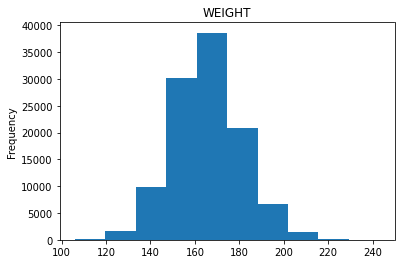

In [0]:
df_vizp['WEIGHT'].plot(kind = 'hist', title = 'WEIGHT')

Out[57]: <AxesSubplot:title={'center':'HEIGHT'}, ylabel='Frequency'>

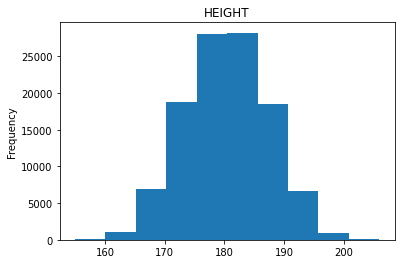

In [0]:
df_vizp['HEIGHT'].plot(kind= 'hist', title = 'HEIGHT')

Out[58]: <AxesSubplot:title={'center':'CROSSING'}, ylabel='Frequency'>

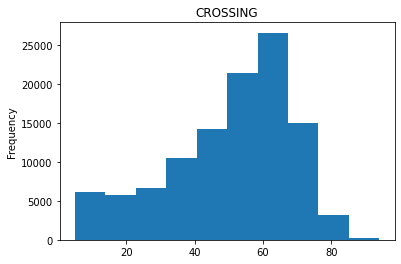

In [0]:
df_vizp['CROSSING'].plot(kind = 'hist', title = 'CROSSING')

In [0]:
nationality_overall = df_viz.groupby('NATIONALITY').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False)
nationality_overall = nationality_overall.toPandas()
display(nationality_overall[0:10])

NATIONALITY,avg(OVERALL)
Mozambique,71.70370370370371
Brazil,71.49360341151386
Algeria,70.84782608695652
Portugal,70.63348416289593
Czech Republic,70.62264150943396
Libya,70.56521739130434
Egypt,70.35616438356165
São Tomé & Príncipe,70.33333333333333
Trinidad and Tobago,70.27272727272727
Syria,70.18518518518519


Output can only be rendered in Databricks

In [0]:
wo = df_viz.groupby('WAGE').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False)
wo = wo.toPandas()
display(wo)

WAGE,avg(OVERALL)
575000.0,93.8
560000.0,93.5
410000.0,93.0
400000.0,92.0
450000.0,91.33333333333333
320000.0,91.0
470000.0,91.0
425000.0,91.0
420000.0,91.0
370000.0,90.33333333333333


Output can only be rendered in Databricks

In [0]:
weight_overall = df_viz.groupby('WEIGHT').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False)
weight_overall = weight_overall.toPandas()
display(weight_overall)

WEIGHT,avg(OVERALL)
226.6,74.66666666666667
206.8,73.1
211.2,72.0
227.0,71.2
214.0,70.96
202.4,70.15873015873017
218.0,70.125
203.0,69.97206703910615
223.0,69.92307692307692
212.0,69.75


Output can only be rendered in Databricks

In [0]:
w = df_viz.groupby('OVERALL').agg({'WEIGHT':'avg'}).sort(col("avg(WEIGHT)"), ascending = False)
w = w.toPandas()
display(w)

OVERALL,avg(WEIGHT)
90,180.75428597586495
88,175.80000003767603
89,175.4967742427703
92,170.89999961853027
85,170.6542059639904
82,170.35771803887897
80,170.21919210414694
94,169.83333333333334
83,169.69641246710123
84,169.29003021148037


Output can only be rendered in Databricks

In [0]:
country_overall = df_viz.groupby('NATIONALITY').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False)
country_overall = country_overall.toPandas()
display(country_overall[0:30])

NATIONALITY,avg(OVERALL)
Mozambique,71.70370370370371
Brazil,71.49360341151386
Algeria,70.84782608695652
Portugal,70.63348416289593
Czech Republic,70.62264150943396
Libya,70.56521739130434
Egypt,70.35616438356165
São Tomé & Príncipe,70.33333333333333
Trinidad and Tobago,70.27272727272727
Syria,70.18518518518519


Output can only be rendered in Databricks

In [0]:
display(df_viz.groupby('INTERNATIONAL_REPUTATION').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False))

INTERNATIONAL_REPUTATION,avg(OVERALL)
5.0,90.25581395348837
4.0,84.95026178010471
3.0,80.62367572547214
2.0,75.43998081304713
1.0,65.46177410356545


Output can only be rendered in Databricks

In [0]:
country_wage = df_viz.groupby('NATIONALITY').agg({'WAGE':'avg'}).sort(col("avg(WAGE)"), ascending = False)
country_wage = country_wage.toPandas()
display(country_wage[0:30])

NATIONALITY,avg(WAGE)
Gabon,23580.582524271846
Armenia,22968.367346938776
Algeria,20489.402173913044
Tanzania,20363.636363636364
Syria,19388.88888888889
Croatia,18826.71624713959
Brazil,18813.63539445629
Dominican Republic,17333.333333333332
Belgium,17036.825667234527
Spain,16385.889021479714


Output can only be rendered in Databricks

In [0]:
display(df_viz.groupby('INTERNATIONAL_REPUTATION').agg({'WAGE':'avg'}).sort(col("avg(WAGE)"), ascending = False))

INTERNATIONAL_REPUTATION,avg(WAGE)
5.0,270209.3023255814
4.0,155009.16230366493
3.0,71432.65776140027
2.0,32546.738218011753
1.0,6842.397930719683


Output can only be rendered in Databricks

In [0]:
# Fist highest feature importance in the gradient boost
display(df_viz.groupby('WEIGHT').agg({'OVERALL':'avg'}).sort(col("avg(OVERALL)"), ascending = False))

WEIGHT,avg(OVERALL)
226.6,74.66666666666667
206.8,73.1
211.2,72.0
227.0,71.2
214.0,70.96
202.4,70.15873015873017
218.0,70.125
203.0,69.97206703910615
223.0,69.92307692307692
212.0,69.75


In [0]:
# Second highest feature importance in the gradient boost
display(df_viz.groupby('CROSSING').agg({'WAGE':'avg'}).sort(col("avg(WAGE)"), ascending = False))

CROSSING,avg(WAGE)
94.0,360000.0
93.0,184333.33333333334
92.0,157800.0
88.0,130613.63636363637
87.0,120090.90909090909
85.0,106359.09090909091
90.0,95315.78947368421
84.0,89652.54237288136
86.0,84402.06185567011
83.0,79959.88372093023


In [0]:
display(df_viz.groupby('AGILITY').agg({'WAGE':'avg'}).sort(col("avg(WAGE)"), ascending = False))

AGILITY,avg(WAGE)
96.0,233777.77777777778
94.0,61342.69662921348
93.0,43693.37016574586
95.0,41333.333333333336
92.0,33438.30985915493
91.0,29615.970961887477
89.0,22898.504273504273
90.0,22647.533333333333
87.0,22397.86269430052
86.0,22038.516746411482


In [0]:
df_wage = df_train

In [0]:
display(df_wage)

ID,NAME,AGE,NATIONALITY,OVERALL,POTENTIAL,CLUB,VALUE,WAGE,SPECIAL,PREFERRED_FOOT,INTERNATIONAL_REPUTATION,WEAK_FOOT,SKILL_MOVES,WORK_RATE,POSITION,HEIGHT,WEIGHT,CROSSING,FINISHING,HEADINGACCURACY,SHORTPASSING,VOLLEYS,DRIBBLING,CURVE,FKACCURACY,LONGPASSING,BALLCONTROL,ACCELERATION,SPRINTSPEED,AGILITY,REACTIONS,BALANCE,SHOTPOWER,JUMPING,STAMINA,STRENGTH,LONGSHOTS,AGGRESSION,INTERCEPTIONS,POSITIONING,VISION,PENALTIES,COMPOSURE,STANDINGTACKLE,SLIDINGTACKLE,YEAR
243896,A. Abdellaoui,25,Algeria,60,63.0,FC Sion,210000.0,4000.0,1496.0,Left,1.0,2.0,2.0,Medium/ High,SUB,185.42,165.0,56.0,25.0,56.0,53.0,32.0,44.0,30.0,35.0,45.0,50.0,66.0,63.0,50.0,53.0,58.0,45.0,72.0,59.0,65.0,24.0,60.0,55.0,48.0,48.0,45.0,53.0,66.0,65.0,2019
198076,A. Abdennour,28,Tunisia,72,72.0,Olympique de Marseille,2500000.0,30000.0,1718.0,Left,2.0,3.0,2.0,Medium/ Medium,SUB,187.96,185.0,56.0,48.0,74.0,58.0,32.0,48.0,48.0,39.0,62.0,51.0,52.0,54.0,60.0,63.0,51.0,74.0,77.0,67.0,83.0,60.0,75.0,72.0,45.0,53.0,51.0,75.0,73.0,75.0,2019
138698,A. Abdi,31,Switzerland,69,69.0,Sheffield Wednesday,900000.0,15000.0,1828.0,Right,2.0,4.0,3.0,Medium/ Low,RES,180.34,165.0,68.0,61.0,59.0,74.0,64.0,70.0,68.0,73.0,72.0,74.0,62.0,54.0,66.0,66.0,70.0,72.0,51.0,44.0,57.0,73.0,74.0,46.0,66.0,72.0,66.0,75.0,60.0,57.0,2019
245438,A. Abdu,21,Eritrea,65,71.0,Al Wehda,750000.0,6000.0,1509.0,Right,1.0,3.0,2.0,Medium/ Low,SUB,177.8,154.0,39.0,68.0,61.0,49.0,64.0,61.0,59.0,39.0,40.0,62.0,68.0,72.0,59.0,61.0,74.0,62.0,65.0,63.0,57.0,63.0,29.0,15.0,68.0,55.0,68.0,49.0,13.0,15.0,2019
245415,A. Abdulhameed,24,Saudi Arabia,56,59.0,Al Hazem,80000.0,2000.0,845.0,Left,1.0,3.0,1.0,Medium/ Medium,RES,172.72,154.0,10.0,9.0,13.0,26.0,6.0,6.0,11.0,11.0,20.0,13.0,34.0,32.0,26.0,48.0,41.0,20.0,55.0,27.0,40.0,5.0,21.0,10.0,4.0,42.0,10.0,34.0,12.0,11.0,2019
237419,A. Abedzadeh,25,Iran,72,75.0,Clube Sport Marítimo,2800000.0,6000.0,1017.0,Right,1.0,2.0,1.0,Medium/ Medium,SUB,185.42,176.0,12.0,10.0,13.0,24.0,12.0,10.0,13.0,14.0,18.0,15.0,30.0,25.0,53.0,70.0,36.0,14.0,55.0,21.0,60.0,11.0,26.0,14.0,10.0,47.0,11.0,34.0,14.0,14.0,2019
243210,A. Abeid,20,Mauritania,66,74.0,AD Alcorcón,825000.0,3000.0,1650.0,Left,1.0,3.0,2.0,High/ Medium,SUB,175.26,161.0,59.0,40.0,60.0,64.0,33.0,58.0,47.0,42.0,51.0,67.0,76.0,72.0,69.0,67.0,75.0,46.0,63.0,68.0,73.0,44.0,53.0,64.0,46.0,42.0,40.0,55.0,65.0,64.0,2019
225716,A. Ablet,31,China PR,59,59.0,Henan Jianye FC,100000.0,2000.0,1685.0,Left,1.0,3.0,2.0,High/ Medium,LWB,177.8,150.0,62.0,57.0,49.0,58.0,52.0,59.0,44.0,60.0,54.0,64.0,64.0,66.0,68.0,60.0,56.0,58.0,67.0,62.0,61.0,53.0,70.0,57.0,55.0,58.0,58.0,62.0,50.0,48.0,2019
247092,A. Abrahamsson,18,Sweden,54,64.0,Djurgårdens IF,90000.0,500.0,1245.0,Right,1.0,4.0,2.0,Medium/ Medium,SUB,187.96,165.0,24.0,22.0,52.0,44.0,25.0,50.0,23.0,24.0,49.0,52.0,55.0,50.0,45.0,48.0,49.0,29.0,71.0,53.0,74.0,24.0,59.0,49.0,23.0,24.0,31.0,34.0,52.0,51.0,2019
199282,A. Abrashi,28,Albania,71,71.0,SC Freiburg,1900000.0,15000.0,1871.0,Right,1.0,2.0,2.0,High/ High,SUB,172.72,157.0,52.0,49.0,38.0,64.0,47.0,60.0,51.0,45.0,59.0,63.0,67.0,64.0,82.0,68.0,87.0,71.0,74.0,83.0,68.0,56.0,89.0,73.0,56.0,59.0,54.0,58.0,75.0,76.0,2019


In [0]:
df_train = df_train.withColumnRenamed('OVERALL', 'label')

In [0]:
#Split the data in Train and Test sets
from sklearn.model_selection  import train_test_split

(train, test) = df_train.randomSplit([0.7,0.3], seed = 0)

train.cache()
test.cache()

print("Total rows: %s, Training rows: %s, Test rows: %s" % (df_train.count(), train.count(), test.count()))

Total rows: 109520, Training rows: 76770, Test rows: 32750


In [0]:
from pyspark.ml.feature import VectorAssembler,VectorIndexer,OneHotEncoder,StringIndexer,StandardScaler, Normalizer
numericCols =  ['POTENTIAL','label','VALUE','WAGE','INTERNATIONAL_REPUTATION','AGE','SPECIAL','WEAK_FOOT','HEIGHT','WEIGHT','CROSSING','FINISHING','HEADINGACCURACY','SHORTPASSING','VOLLEYS','DRIBBLING','JUMPING','STAMINA','STRENGTH','LONGSHOTS','AGGRESSION','INTERCEPTIONS','POSITIONING','VISION','PENALTIES','COMPOSURE','STANDINGTACKLE','SLIDINGTACKLE']
categorical = ['PREFERRED_FOOT', 'WORK_RATE', 'POSITION','NATIONALITY','CLUB']
#String indexer
indexOutput = [x + '_idx' for x in categorical]
stringIndexer = StringIndexer(inputCols=categorical, outputCols=indexOutput).setHandleInvalid('keep')
#Onehot encoding
oheOutput = [x + '_ohe' for x in categorical]
ohe = OneHotEncoder(inputCols=indexOutput, outputCols=oheOutput).setHandleInvalid('keep')

In [0]:
#Assemble input columns in to a single vector
assemblerInput = oheOutput + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInput, outputCol='features').setHandleInvalid('keep')

In [0]:
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [0]:
from pyspark.ml.regression import RandomForestRegressor, DecisionTreeRegressor, GBTRegressor, LinearRegression
#DecisionTree Regressor
dtr = DecisionTreeRegressor(featuresCol='features_norm', labelCol='label')

#Logistic Regression
lr = LinearRegression(featuresCol = 'features_norm', labelCol='label')

#Random Forest Regressor
rfr = RandomForestRegressor(featuresCol = 'features_norm', labelCol = 'label')

#GBT Regressor
gbt = GBTRegressor(featuresCol = 'features_norm', labelCol = 'label')

In [0]:
from pyspark.ml import Pipeline, PipelineModel
dtr_pipe = Pipeline(stages=[stringIndexer, ohe, vecAssembler,normalizer, dtr])
lr_pipe = Pipeline(stages=[stringIndexer, ohe, vecAssembler,normalizer, lr])
rfr_pipe = Pipeline(stages=[stringIndexer, ohe,  vecAssembler,normalizer, rfr])
gbt_pipe = Pipeline(stages=[stringIndexer, ohe,  vecAssembler,normalizer, gbt])

In [0]:
dtrModel = dtr_pipe.fit(train.drop('ID', 'NAME', 'YEAR'))
lrModel = lr_pipe.fit(train.drop('ID', 'NAME', 'YEAR'))
rfrModel = rfr_pipe.fit(train.drop('ID', 'NAME', 'YEAR'))
gbtModel = gbt_pipe.fit(train.drop('ID', 'NAME', 'YEAR'))

In [0]:
dtrpred = dtrModel.transform(test.drop('ID','NAME','YEAR'))
lrpred = lrModel.transform(test.drop('ID','NAME','YEAR'))
rfrpred = rfrModel.transform(test.drop('ID','NAME','YEAR'))
gbtpred = gbtModel.transform(test.drop('ID','NAME','YEAR'))

In [0]:
va = gbtModel.stages[-3]
tree = gbtModel.stages[-1]
tree.featureImportances
print(tree)
print(tree.toDebugString) 
list(zip(va.getInputCols(), (tree.featureImportances)))

GBTRegressionModel: uid=GBTRegressor_7a89df680363, numTrees=20, numFeatures=1399
GBTRegressionModel: uid=GBTRegressor_7a89df680363, numTrees=20, numFeatures=1399
  Tree 0 (weight 1.0):
    If (feature 1371 <= 6.394135236346927E-5)
     If (feature 1371 <= 1.678440737699009E-5)
      If (feature 1371 <= 6.950406975883527E-6)
       If (feature 1371 <= 3.5678238466584346E-6)
        If (feature 1393 <= 2.1143156178374187E-6)
         Predict: 85.11304347826086
        Else (feature 1393 > 2.1143156178374187E-6)
         Predict: 82.16144975288303
       Else (feature 1371 > 3.5678238466584346E-6)
        If (feature 1386 <= 5.211323296753199E-6)
         Predict: 79.95671834625323
        Else (feature 1386 > 5.211323296753199E-6)
         Predict: 78.32945285215366
      Else (feature 1371 > 6.950406975883527E-6)
       If (feature 1371 <= 9.47221621692791E-6)
        If (feature 1375 <= 1.5365672137756208E-7)
         Predict: 76.16399416909621
        Else (feature 1375 > 1.5365672137

In [0]:
# Manually display feature importances

feature_imp = spark.createDataFrame([['PREFERRED_FOOT_ohe', 0.0018507441063953713],
 ['WORK_RATE_ohe', 4.382796948497335e-05],
 ['POSITION_ohe', 0.0],
 ['NATIONALITY_ohe', 0.007053588148171547],
 ['CLUB_ohe', 1.2857666160201961e-05],
 ['BODY_TYPE_ohe', 0.0008066926361168517],
 ['POTENTIAL', 0.0002801312236227006],
 ['label', 0.0],
 ['VALUE', 0.0],
 ['WAGE', 0.00012164503185911854],
 ['INTERNATIONAL_REPUTATION', 0.000638337629850905],
 ['AGE', 2.8360441300861477e-05],
 ['SPECIAL', 0.0],
 ['WEAK_FOOT', 0.0],
 ['HEIGHT', 0.00961706057833577],
 ['WEIGHT', 0.03359232695707245],
 ['CROSSING', 0.009704353551193888],
 ['FINISHING', 0.0016266567526931237],
 ['HEADINGACCURACY', 0.0006519152886496],
 ['SHORTPASSING', 0.0019990859691202375],
 ['VOLLEYS', 0.0023339420479708615],
 ['DRIBBLING', 6.611075786626193e-06],
 ['JUMPING', 0.0019697637009742975],
 ['STAMINA', 5.3333926980180434e-05],
 ['STRENGTH', 0.0010929538093048116],
 ['LONGSHOTS', 0.0],
 ['AGGRESSION', 0.0],
 ['INTERCEPTIONS', 1.068524836430548e-06],
 ['POSITIONING', 0.0007278642255239524],
 ['VISION', 9.026764298326058e-05],
 ['PENALTIES', 0.0],
 ['COMPOSURE', 0.0],
 ['STANDINGTACKLE', 0.0],
 ['SLIDINGTACKLE', 0.0]],
['Feature', 'Importance'])

In [0]:
display(feature_imp)

Feature,Importance
PREFERRED_FOOT_ohe,0.0018507441063953713
WORK_RATE_ohe,4.382796948497335E-5
POSITION_ohe,0.0
NATIONALITY_ohe,0.007053588148171547
CLUB_ohe,1.2857666160201961E-5
BODY_TYPE_ohe,8.066926361168517E-4
POTENTIAL,2.801312236227006E-4
label,0.0
VALUE,0.0
WAGE,1.2164503185911854E-4


Output can only be rendered in Databricks

Output can only be rendered in Databricks

In [0]:
from pyspark.ml.evaluation import RegressionEvaluator
evaluator=RegressionEvaluator(predictionCol="prediction")
dtr_mse = evaluator.evaluate(dtrpred)
dtr_r2 = evaluator.evaluate(dtrpred, {evaluator.metricName: "r2"})
dtr_mae = evaluator.evaluate(dtrpred, {evaluator.metricName: "mae"})
print('Decision Tree Regressor')
print("MSE: ", dtr_mse)
print('r2 :', dtr_r2)
print('mae :', dtr_mae)

Decision Tree Regressor
MSE:  2.602054453180292
r2 : 0.8612427796897476
mae : 1.7740849664787584


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
lr_mse = evaluator.evaluate(lrpred)
lr_r2 = evaluator.evaluate(lrpred, {evaluator.metricName: "r2"})
lr_mae = evaluator.evaluate(lrpred, {evaluator.metricName: "mae"})
print('Linear Regression')
print("MSE: ", lr_mse)
print('r2 :', lr_r2)
print('mae :', lr_mae)

Linear Regression
MSE:  9.574633550369985
r2 : -0.8787420332416431
mae : 3.8321970321951735


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
rfr_mse = evaluator.evaluate(rfrpred)
rfr_r2 = evaluator.evaluate(rfrpred, {evaluator.metricName: "r2"})
rfr_mae = evaluator.evaluate(rfrpred, {evaluator.metricName: "mae"})
print('Random Forest Regressor')
print("MSE: ", rfr_mse)
print('r2 :', rfr_r2)
print('mae :', rfr_mae)

Random Forest Regressor
MSE:  2.5603083531304662
r2 : 0.8656593714946759
mae : 1.7374024864007316


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
gbt_mse = evaluator.evaluate(gbtpred)
gbt_r2 = evaluator.evaluate(gbtpred, {evaluator.metricName: "r2"})
gbt_mae = evaluator.evaluate(gbtpred, {evaluator.metricName: "mae"})
print('Gradient Boosting Regression')
print("MSE: ", gbt_mse)
print('r2 :', gbt_r2)
print('mae :', gbt_mae)

Gradient Boosting Regression
MSE:  2.0469772381823823
r2 : 0.9141285381117682
mae : 1.4553875500419498


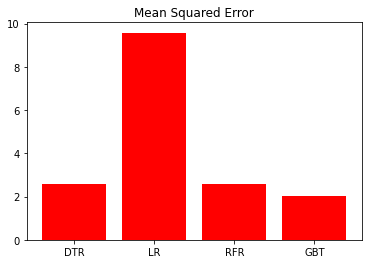

In [0]:
mse_overall = {'DTR': dtr_mse,'LR': lr_mse,'RFR': rfr_mse,'GBT': gbt_mse}
names = list(mse_overall.keys())
values = list(mse_overall.values())
plt.bar(range(len(mse_overall)), values, tick_label=names, color = 'r' )
plt.title('Mean Squared Error')
plt.show()

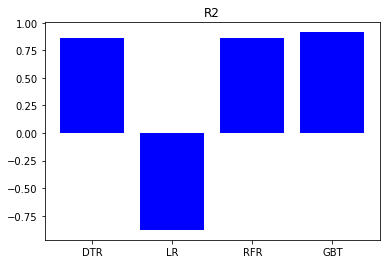

In [0]:
r2_overall = {'DTR': dtr_r2,'LR': lr_r2,'RFR': rfr_r2,'GBT': gbt_r2}
names = list(r2_overall.keys())
values = list(r2_overall.values())
plt.bar(range(len(r2_overall)), values, tick_label=names, color = 'b' )
plt.title('R2')
plt.show()

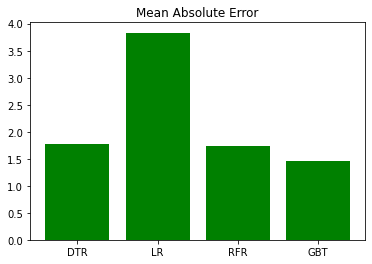

In [0]:
mae_overall = {'DTR': dtr_mae,'LR': lr_mae,'RFR': rfr_mae,'GBT': gbt_mae}
names = list(mae_overall.keys())
values = list(mae_overall.values())
plt.bar(range(len(mae_overall)), values, tick_label=names, color = 'g' )
plt.title('Mean Absolute Error')
plt.show()

WAGE PREDICTION

In [0]:
df_wage = df_wage.withColumnRenamed('WAGE', 'label')

In [0]:
(wtrain, wtest) = df_wage.randomSplit([0.7,0.3], seed = 0)

wtrain.cache()
wtest.cache()

Out[99]: DataFrame[ID: string, NAME: string, AGE: int, NATIONALITY: string, OVERALL: int, POTENTIAL: double, CLUB: string, VALUE: double, label: double, SPECIAL: double, PREFERRED_FOOT: string, INTERNATIONAL_REPUTATION: double, WEAK_FOOT: double, SKILL_MOVES: double, WORK_RATE: string, POSITION: string, HEIGHT: float, WEIGHT: float, CROSSING: double, FINISHING: double, HEADINGACCURACY: double, SHORTPASSING: double, VOLLEYS: double, DRIBBLING: double, CURVE: double, FKACCURACY: double, LONGPASSING: double, BALLCONTROL: double, ACCELERATION: double, SPRINTSPEED: double, AGILITY: double, REACTIONS: double, BALANCE: double, SHOTPOWER: double, JUMPING: double, STAMINA: double, STRENGTH: double, LONGSHOTS: double, AGGRESSION: double, INTERCEPTIONS: double, POSITIONING: double, VISION: double, PENALTIES: double, COMPOSURE: double, STANDINGTACKLE: double, SLIDINGTACKLE: double, YEAR: string]

In [0]:
numericCols =  ['POTENTIAL','OVERALL','VALUE','label','INTERNATIONAL_REPUTATION','AGE','SPECIAL','WEAK_FOOT','HEIGHT','WEIGHT','CROSSING','FINISHING','HEADINGACCURACY','SHORTPASSING','VOLLEYS','DRIBBLING','JUMPING','STAMINA','STRENGTH','LONGSHOTS','AGGRESSION','INTERCEPTIONS','POSITIONING','VISION','PENALTIES','COMPOSURE','STANDINGTACKLE','SLIDINGTACKLE']
categorical = ['PREFERRED_FOOT', 'WORK_RATE', 'POSITION','NATIONALITY','CLUB']
#String indexer
indexOutput = [x + '_idx' for x in categorical]
stringIndexer = StringIndexer(inputCols=categorical, outputCols=indexOutput).setHandleInvalid('keep')
#Onehot encoding
oheOutput = [x + '_ohe' for x in categorical]
ohe = OneHotEncoder(inputCols=indexOutput, outputCols=oheOutput).setHandleInvalid('keep')

In [0]:
assemblerInput = oheOutput + numericCols
vecAssembler = VectorAssembler(inputCols=assemblerInput, outputCol='features').setHandleInvalid('keep')

In [0]:
normalizer = Normalizer(inputCol="features", outputCol="features_norm", p=1.0)

In [0]:
#DecisionTree Regressor
dtr_wage = DecisionTreeRegressor(featuresCol='features_norm', labelCol='label')

#Logistic Regression
lr_wage = LinearRegression(featuresCol = 'features_norm', labelCol='label')

#Random Forest Regressor
rfr_wage = RandomForestRegressor(featuresCol = 'features_norm', labelCol = 'label')

#GBT Regressor
gbt_wage = GBTRegressor(featuresCol = 'features_norm', labelCol = 'label')

In [0]:
dtr_wage_pipe = Pipeline(stages=[stringIndexer, ohe, vecAssembler,normalizer, dtr_wage])
lr_wage_pipe = Pipeline(stages=[stringIndexer, ohe, vecAssembler,normalizer, lr_wage])
rfr_wage_pipe = Pipeline(stages=[stringIndexer, ohe,  vecAssembler,normalizer, rfr_wage])
gbt_wage_pipe = Pipeline(stages=[stringIndexer, ohe,  vecAssembler,normalizer, gbt_wage])

In [0]:
dtrwageModel = dtr_wage_pipe.fit(wtrain.drop('ID', 'NAME', 'YEAR'))
lrwageModel = lr_wage_pipe.fit(wtrain.drop('ID', 'NAME', 'YEAR'))
rfrwageModel = rfr_wage_pipe.fit(wtrain.drop('ID', 'NAME', 'YEAR'))
gbtwageModel = gbt_wage_pipe.fit(wtrain.drop('ID', 'NAME', 'YEAR'))

In [0]:
dtrwagepred = dtrwageModel.transform(wtest.drop('ID','NAME','YEAR'))
lrwagepred = lrwageModel.transform(wtest.drop('ID','NAME','YEAR'))
rfrwagepred = rfrwageModel.transform(wtest.drop('ID','NAME','YEAR'))
gbtwagepred = gbtwageModel.transform(wtest.drop('ID','NAME','YEAR'))

In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
dtr_mse = evaluator.evaluate(dtrwagepred)
dtr_r2 = evaluator.evaluate(dtrwagepred, {evaluator.metricName: "r2"})
dtr_mae = evaluator.evaluate(dtrwagepred, {evaluator.metricName: "mae"})
print('Decision Tree Regressor')
print("MSE: ", dtr_mse)
print('r2 :', dtr_r2)
print('mae :', dtr_mae)

Decision Tree Regressor
MSE:  9201.093988365965
r2 : 0.8297464912391534
mae : 3501.035327400956


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
lr_wage_mse = evaluator.evaluate(lrwagepred)
lr_wage_r2 = evaluator.evaluate(lrwagepred, {evaluator.metricName: "r2"})
lr_wage_mae = evaluator.evaluate(lrwagepred, {evaluator.metricName: "mae"})
print('Linear Regression')
print("MSE: ", lr_wage_mse)
print('r2 :', lr_wage_r2)
print('mae :', lr_wage_mae)

Linear Regression
MSE:  34374.45511925807
r2 : -1.3762316851648162
mae : 10941.963428339794


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
rfr_wage_mse = evaluator.evaluate(rfrwagepred)
rfr_wage_r2 = evaluator.evaluate(rfrwagepred, {evaluator.metricName: "r2"})
rfr_wage_mae = evaluator.evaluate(rfrwagepred, {evaluator.metricName: "mae"})
print('Random Forest Regressor')
print("MSE: ", rfr_wage_mse)
print('r2 :', rfr_wage_r2)
print('mae :', rfr_wage_mae)

Random Forest Regressor
MSE:  7276.751119542521
r2 : 0.8935140818599008
mae : 2634.129632419256


In [0]:
evaluator=RegressionEvaluator(predictionCol="prediction")
gbt_wage_mse = evaluator.evaluate(gbtwagepred)
gbt_wage_r2 = evaluator.evaluate(gbtwagepred, {evaluator.metricName: "r2"})
gbt_wage_mae = evaluator.evaluate(gbtwagepred, {evaluator.metricName: "mae"})
print('Gradient Bossting Regressor')
print("MSE: ", gbt_wage_mse)
print('r2 :', gbt_wage_r2)
print('mae :', gbt_wage_mae)

Gradient Bossting Regressor
MSE:  4987.946470561784
r2 : 0.9499665206185574
mae : 2049.6709565836427
